<a href="https://colab.research.google.com/github/Th4l3s-pr0g/estudo-IA-CC/blob/main/ClusterCustomerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar o dataset para o dataframe.

In [ ]:
import pandas as pd
dataFrame = pd.read_csv("/content/Mall_Customers.csv")

Vamos verificar os dados do dataFrame

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dataFrame.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataFrame.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataFrame.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Vamos analisar a distribuição das idades dos clientes

<Axes: xlabel='Age', ylabel='Count'>

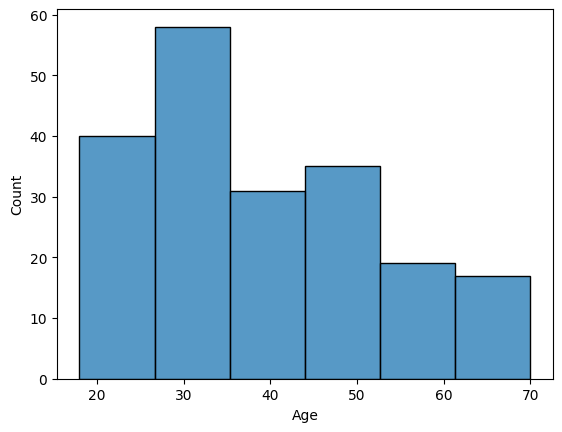

In [ ]:
import seaborn as sns
sns.histplot(dataFrame['Age'], bins=6)

In [ ]:
dataFrame.corr()

<ipython-input-7-6bf2272b98ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


vamos converter os dados para serem numericos

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
dataFrame['Gender'] = labelEncoder.fit_transform(dataFrame['Gender'])

In [ ]:
dataFrame.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Agora que o dataFrame está com os dados numéricos, é hora de separar as variáveis independentes.

In [ ]:
X = dataFrame[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


Agora que as variáveis independentes foram elencadas, vamos normalizar os valores.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

Os dados estão prontos, é hora de fazer a clusterização

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters

array([0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 0, 1, 0, 3, 2, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 3, 2, 3, 0, 1, 2, 1, 2, 1, 2, 1, 0, 3, 2,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 3, 1, 3, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 2, 3, 1, 1, 1, 3, 0, 1, 0, 2, 1, 3, 0, 3, 1, 2, 3, 1, 2,
       2, 1, 1, 0, 3, 1, 2, 0, 1, 2, 3, 0, 2, 1, 3, 0, 3, 2, 1, 3, 3, 3,
       3, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 4, 0, 3, 0, 4, 0,
       2, 2, 4, 2, 1, 0, 4, 2, 1, 0, 2, 2, 4, 0, 4, 2, 4, 0, 4, 0, 1, 2,
       1, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 4, 0, 4, 2, 4, 2, 4, 0, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 0], dtype=int32)

Agora que os clusters foram gerados, vamos atribuir o numero dos clusters correspondente a cada registro do dataframe original

In [ ]:
dataFrame['Clusters'] = clusters
dataFrame

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,1
3,4,0,23,16,77,2
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,4
197,198,1,32,126,74,0
198,199,1,32,137,18,4


Agora é hora de analisar cada grupo para atribuir uma classe ou uma descrição. É agora que há a descoberta de conhecimento.

In [ ]:
dataFrame[dataFrame['Clusters']==0]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,1,19,15,39,0
1,2,1,21,15,81,0
15,16,1,22,20,79,0
17,18,1,20,21,66,0
21,22,1,25,24,73,0
23,24,1,31,25,73,0
25,26,1,29,28,82,0
27,28,1,35,28,61,0
33,34,1,18,33,92,0
41,42,1,24,38,92,0


In [ ]:
dataFrame[dataFrame['Clusters']==1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
2,3,0,20,16,6,1
4,5,0,31,17,40,1
6,7,0,35,18,6,1
12,13,0,58,20,15,1
16,17,0,35,21,35,1
22,23,0,46,25,5,1
24,25,0,54,28,14,1
26,27,0,45,28,32,1
28,29,0,40,29,31,1
34,35,0,49,33,14,1


In [ ]:
dataFrame[dataFrame['Clusters']==2]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
3,4,0,23,16,77,2
5,6,0,22,17,76,2
7,8,0,23,18,94,2
9,10,0,30,19,72,2
11,12,0,35,19,99,2
13,14,0,24,20,77,2
19,20,0,35,23,98,2
29,30,0,23,29,87,2
31,32,0,21,30,73,2
35,36,0,21,33,81,2


In [ ]:
dataFrame[dataFrame['Clusters']==3]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
8,9,1,64,19,3,3
10,11,1,67,19,14,3
14,15,1,37,20,13,3
18,19,1,52,23,29,3
20,21,1,35,24,35,3
30,31,1,60,30,4,3
32,33,1,53,33,4,3
42,43,1,48,39,36,3
53,54,1,59,43,60,3
55,56,1,47,43,41,3


In [ ]:
dataFrame.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000,1.790000
std,57.879185,0.497633,13.969007,26.264721,25.823522,1.317032
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,0.000000,36.000000,61.500000,50.000000,2.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000,3.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000,4.000000


In [ ]:
dataFrame[dataFrame['Clusters']==0].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,41.000000,41.0,41.000000,41.000000,41.000000,41.0
mean,102.756098,1.0,28.536585,61.804878,71.097561,0.0
std,60.765031,0.0,7.127754,28.778655,16.926023,0.0
min,1.000000,1.0,18.000000,15.000000,39.000000,0.0
25%,52.000000,1.0,22.000000,42.000000,56.000000,0.0
50%,104.000000,1.0,28.000000,62.000000,73.000000,0.0
75%,150.000000,1.0,34.000000,78.000000,88.000000,0.0
max,200.000000,1.0,40.000000,137.000000,97.000000,0.0


In [ ]:
dataFrame[dataFrame['Clusters']==1].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,46.000000,46.0,46.000000,46.000000,46.000000,46.0
mean,73.956522,0.0,49.043478,48.913043,37.217391,1.0
std,42.947491,0.0,10.163019,17.685934,16.799356,0.0
min,3.000000,0.0,20.000000,16.000000,5.000000,1.0
25%,39.500000,0.0,44.000000,37.250000,26.500000,1.0
50%,72.500000,0.0,49.000000,49.500000,42.000000,1.0
75%,105.750000,0.0,54.750000,62.750000,50.000000,1.0
max,161.000000,0.0,68.000000,79.000000,59.000000,1.0


In [ ]:
dataFrame[dataFrame['Clusters']==2].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,56.000000,56.0,56.000000,56.000000,56.000000,56.0
mean,101.910714,0.0,28.392857,60.428571,68.178571,2.0
std,59.460079,0.0,5.532314,26.064854,18.502194,0.0
min,4.000000,0.0,18.000000,16.000000,29.000000,2.0
25%,47.500000,0.0,23.000000,39.750000,51.750000,2.0
50%,109.000000,0.0,29.500000,62.500000,73.000000,2.0
75%,154.500000,0.0,32.000000,78.000000,83.500000,2.0
max,196.000000,0.0,40.000000,120.000000,99.000000,2.0


In [ ]:
dataFrame[dataFrame['Clusters']==3].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,28.000000,28.0,28.000000,28.000000,28.000000,28.0
mean,67.821429,1.0,57.214286,46.785714,38.714286,3.0
std,35.224206,0.0,9.795529,15.645037,17.805237,0.0
min,9.000000,1.0,35.000000,19.000000,3.000000,3.0
25%,40.500000,1.0,48.750000,37.500000,33.500000,3.0
50%,68.000000,1.0,59.000000,48.500000,46.000000,3.0
75%,100.000000,1.0,66.250000,61.250000,51.000000,3.0
max,129.000000,1.0,70.000000,71.000000,60.000000,3.0


In [ ]:
dataFrame[dataFrame['Clusters']==4].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.0
mean,168.241379,0.655172,39.724138,90.827586,17.620690,4.0
std,20.951739,0.483725,10.602886,16.812132,10.216981,0.0
min,127.000000,0.000000,19.000000,71.000000,1.000000,4.0
25%,151.000000,0.000000,34.000000,78.000000,10.000000,4.0
50%,171.000000,1.000000,41.000000,87.000000,16.000000,4.0
75%,185.000000,1.000000,47.000000,99.000000,24.000000,4.0
max,199.000000,1.000000,59.000000,137.000000,39.000000,4.0
